# EDA

## Data preparation

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (12,12)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

In [92]:
data = pd.read_csv(os.path.join(os.getcwd(), "data", "smart-home", "train.csv"), sep=",")

In [85]:
data = data.drop("Id", axis=1)

In [86]:
data

,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,9690.24,12604.20,95436.800,758.8800,48.3750,2.0,17.8275
1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,11022.00,10787.20,95436.800,762.0690,47.8080,2.0,18.1207
2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,13960.50,9669.63,95398.600,766.2510,47.4320,2.0,18.4367
3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,18511.20,9648.13,95360.300,766.0370,47.0240,2.0,18.7513
4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,45.4743,2.0,19.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,0.00,0.00,0.000,-3.4340,49.2960,3.0,20.8187
2760,11/04/2012,05:45,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,465.92,2716.67,523.264,3.8520,50.0373,3.0,20.7053
2761,11/04/2012,06:00,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,50.0587,3.0,20.5827
2762,11/04/2012,06:15,191.531,193.387,41.3093,41.8107,20.9853,23.4400,0.0,615.403,0.299333,6795.26,38303.10,7110.660,66.9493,49.8400,3.0,20.5200


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              2764 non-null   object 
 1   Time                              2764 non-null   object 
 2   CO2_(dinning-room)                2764 non-null   float64
 3   CO2_room                          2764 non-null   float64
 4   Relative_humidity_(dinning-room)  2764 non-null   float64
 5   Relative_humidity_room            2764 non-null   float64
 6   Lighting_(dinning-room)           2764 non-null   float64
 7   Lighting_room                     2764 non-null   float64
 8   Meteo_Rain                        2764 non-null   float64
 9   Meteo_Sun_dusk                    2764 non-null   float64
 10  Meteo_Wind                        2764 non-null   float64
 11  Meteo_Sun_light_in_west_facade    2764 non-null   float64
 12  Meteo_

In [88]:
data.nunique()

Date                                  30
Time                                  96
CO2_(dinning-room)                  1661
CO2_room                            1669
Relative_humidity_(dinning-room)    2404
Relative_humidity_room              2403
Lighting_(dinning-room)              785
Lighting_room                       1205
Meteo_Rain                            15
Meteo_Sun_dusk                       491
Meteo_Wind                          1596
Meteo_Sun_light_in_west_facade      1304
Meteo_Sun_light_in_east_facade      1211
Meteo_Sun_light_in_south_facade     1233
Meteo_Sun_irradiance                1459
Outdoor_relative_humidity_Sensor    2581
Day_of_the_week                       14
Indoor_temperature_room             2316
dtype: int64

In [89]:
data["Day_of_the_week"].value_counts()

2.00000    429
3.00000    406
4.00000    380
5.00000    380
6.00000    380
7.00000    380
1.00000    380
2.06667      5
3.06667      4
4.06667      4
5.06667      4
6.06667      4
6.60000      4
1.06667      4
Name: Day_of_the_week, dtype: int64

Let's fix it!

In [90]:
data.loc[data["Day_of_the_week"] == 1.06667, "Day_of_the_week"] = 1
data.loc[data["Day_of_the_week"] == 2.06667, "Day_of_the_week"] = 2
data.loc[data["Day_of_the_week"] == 3.06667, "Day_of_the_week"] = 3
data.loc[data["Day_of_the_week"] == 4.06667, "Day_of_the_week"] = 4
data.loc[data["Day_of_the_week"] == 5.06667, "Day_of_the_week"] = 5
data.loc[data["Day_of_the_week"] == 6.06667, "Day_of_the_week"] = 6
data.loc[data["Day_of_the_week"] == 6.6, "Day_of_the_week"] = 7

In [91]:
data["Day_of_the_week"].value_counts()

2.0    434
3.0    410
4.0    384
5.0    384
6.0    384
7.0    384
1.0    384
Name: Day_of_the_week, dtype: int64

## Variables distribution

In [18]:
cols_to_analyse = data.drop(["Date", "Time", "Day_of_the_week"], axis=1).columns

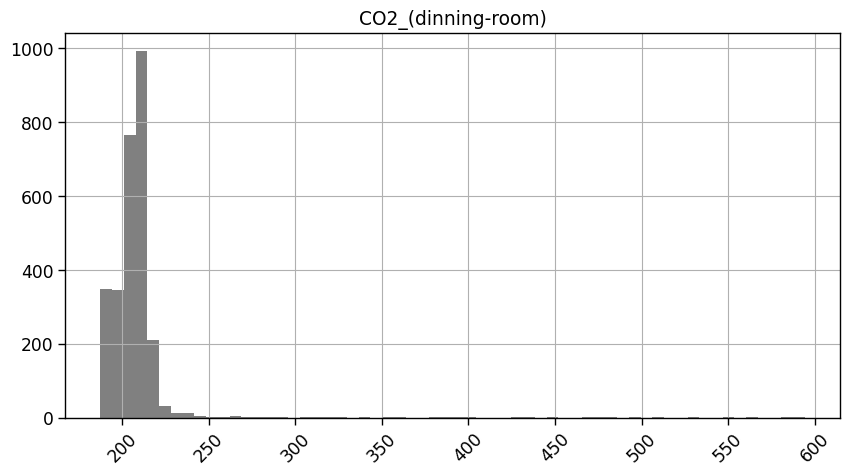

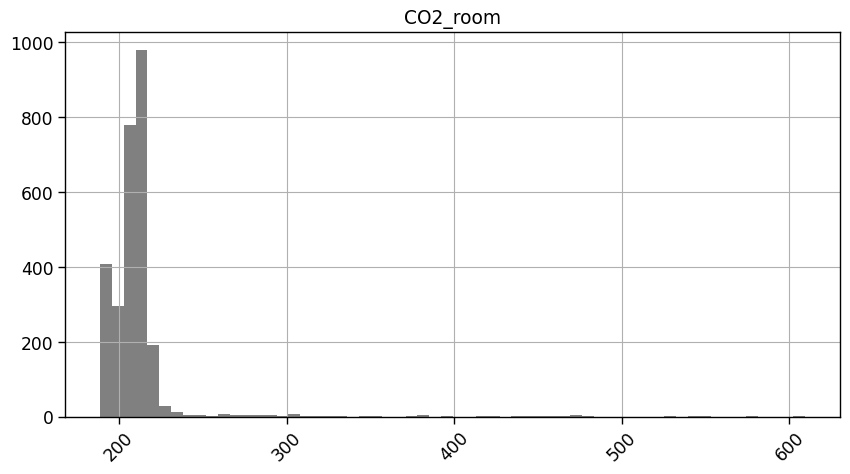

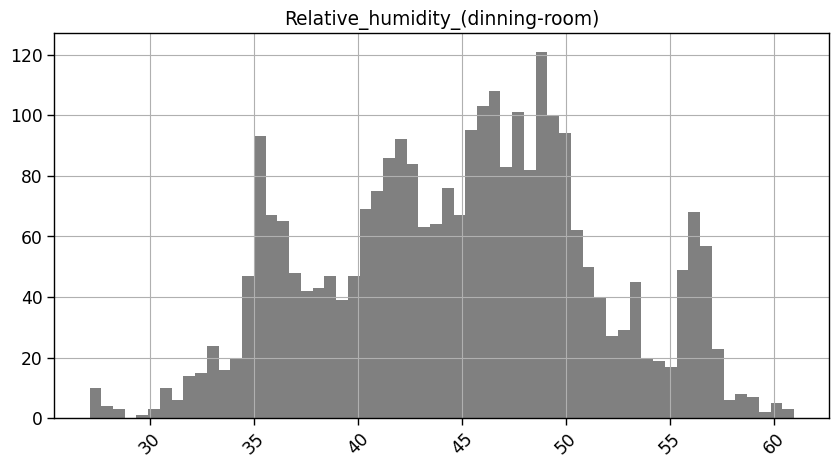

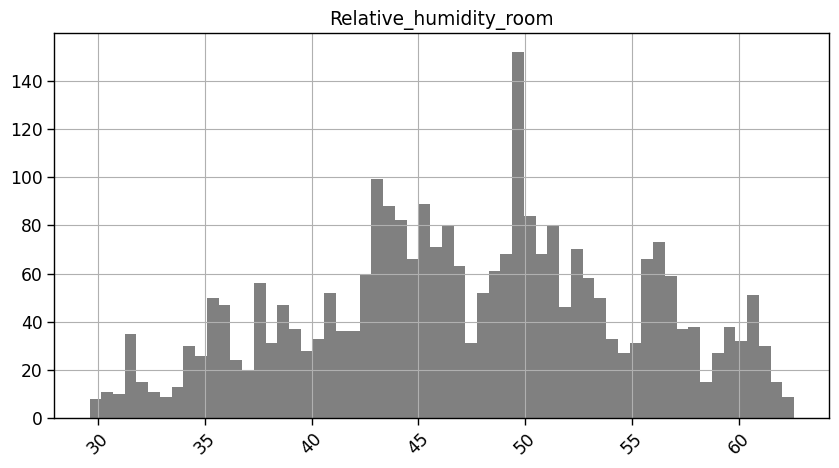

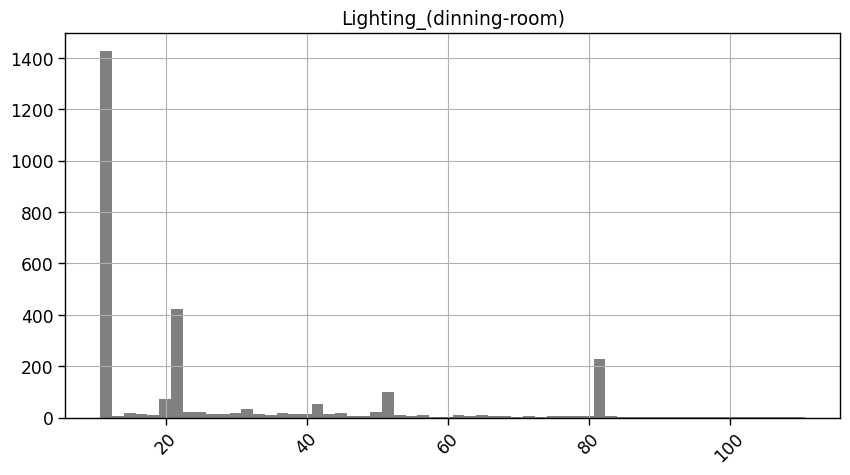

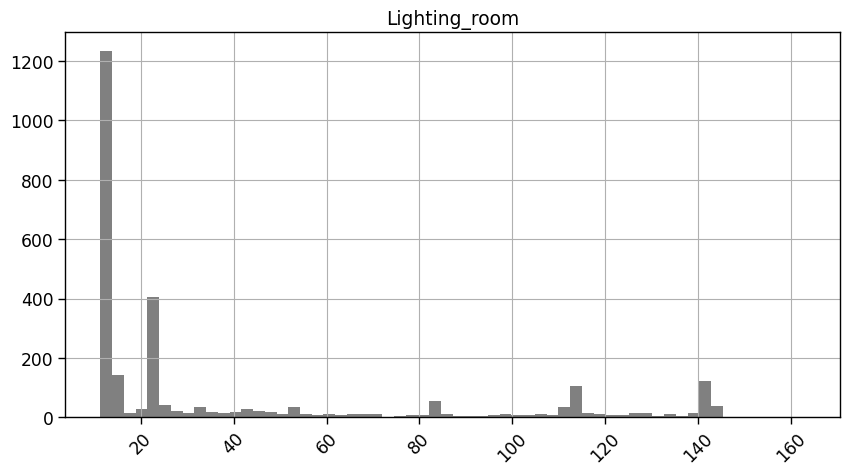

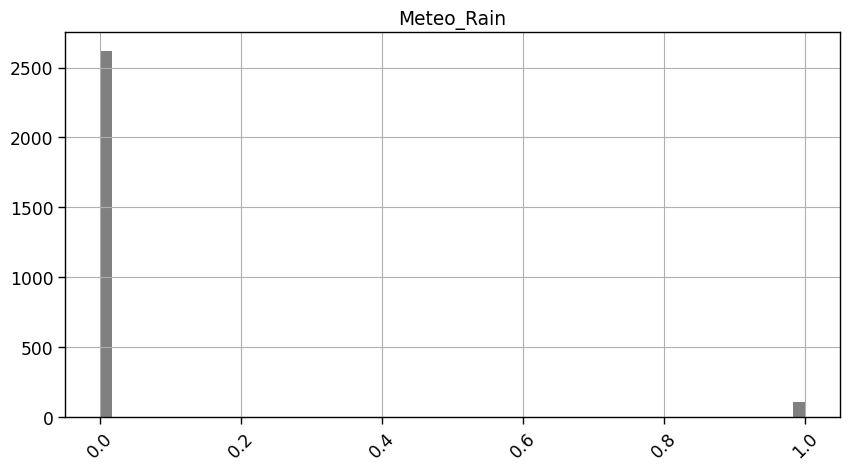

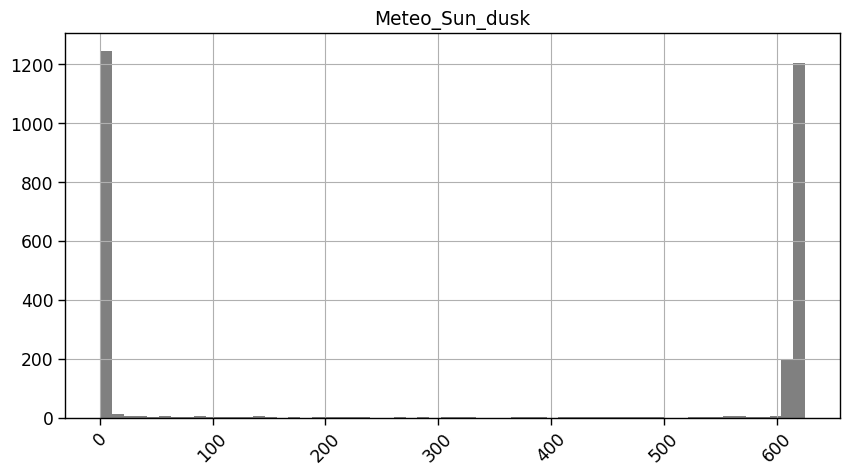

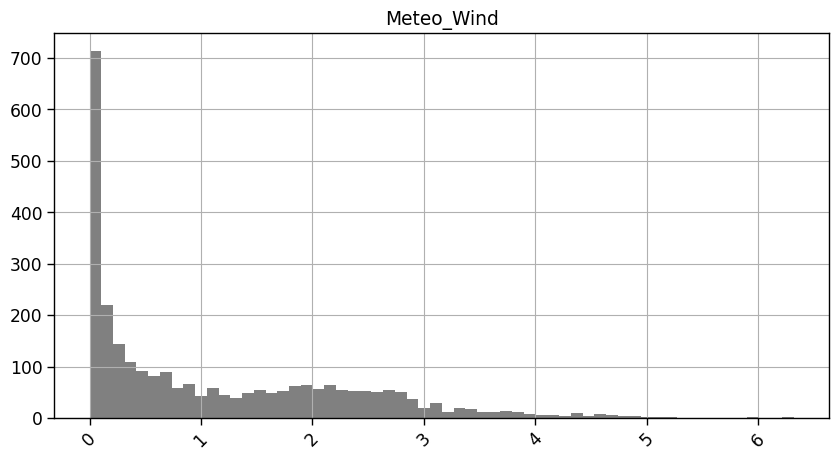

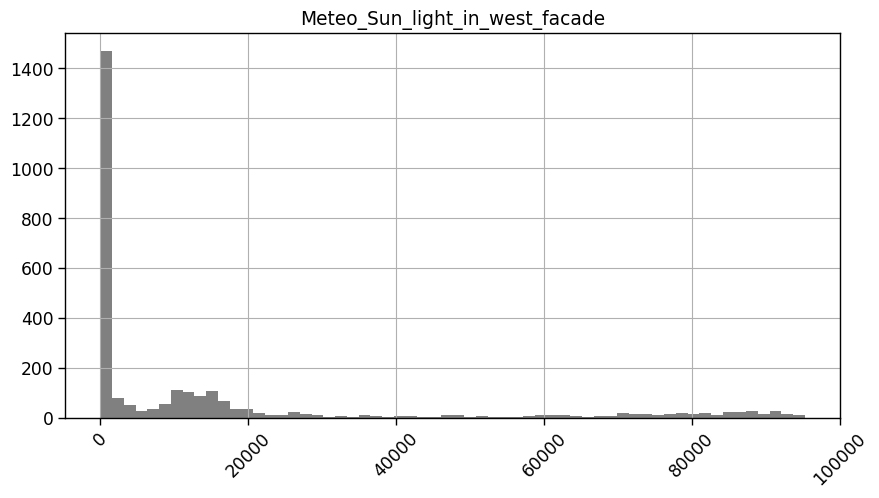

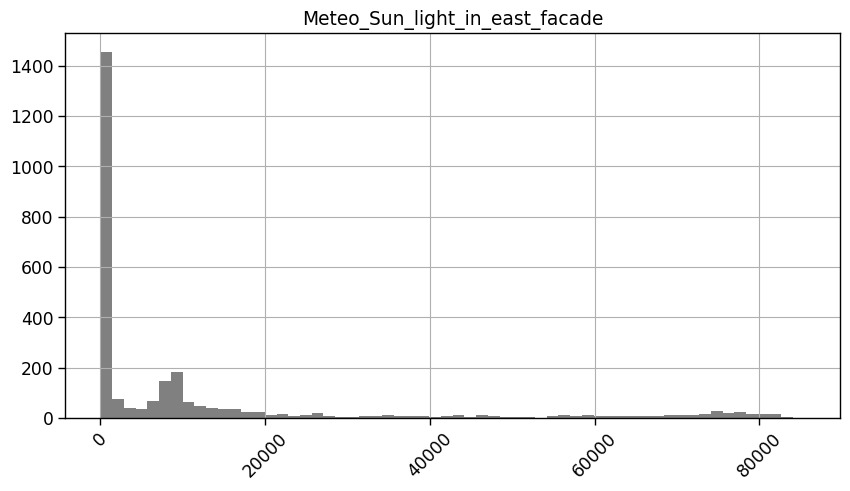

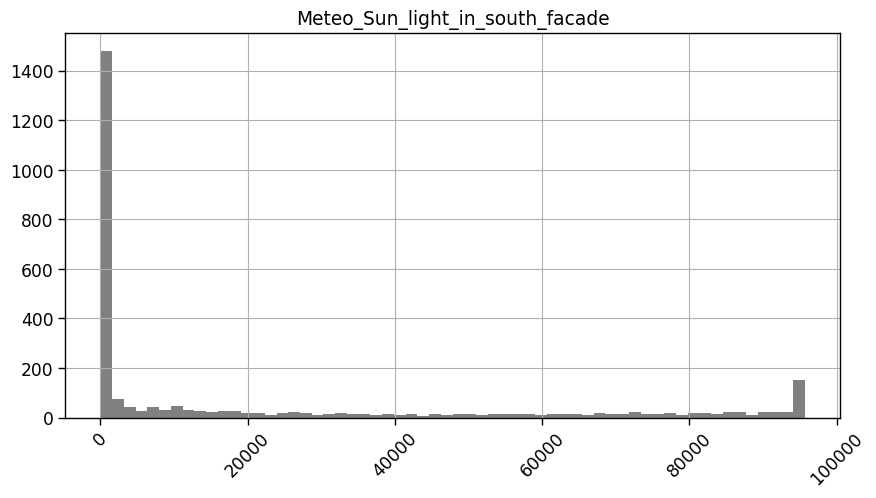

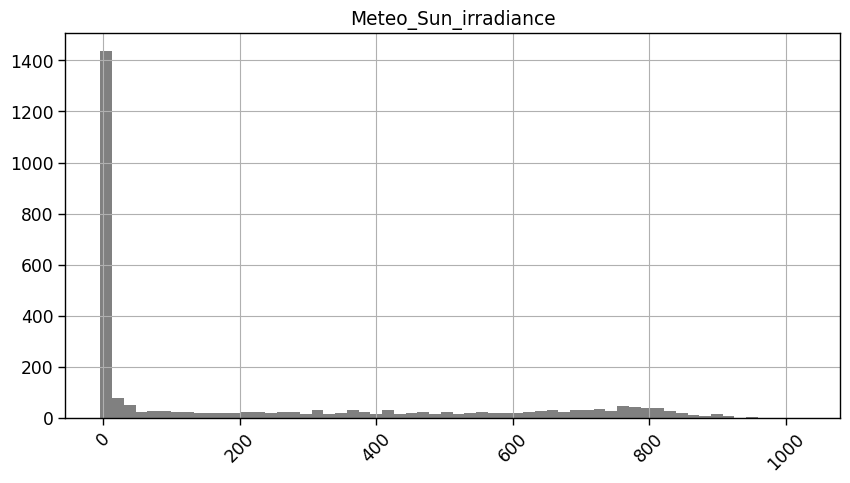

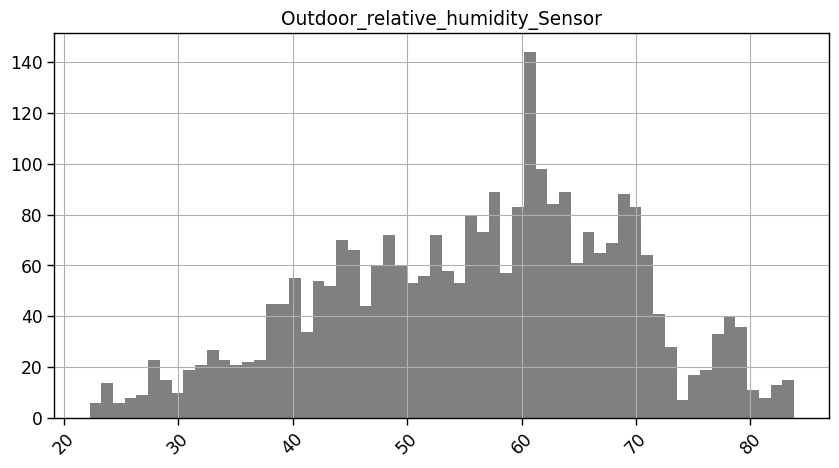

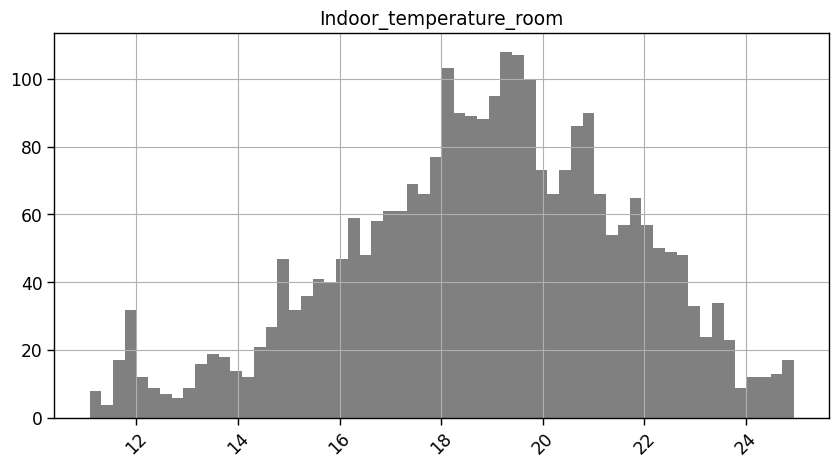

In [68]:
for col in data.drop(["Date", "Time", "Day_of_the_week"], axis=1).columns:
    plt.rcParams['figure.figsize'] = (10,5)
    data[col].hist(bins = 60, color='gray')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

## Correlations

### Correlation matrix

<AxesSubplot: >

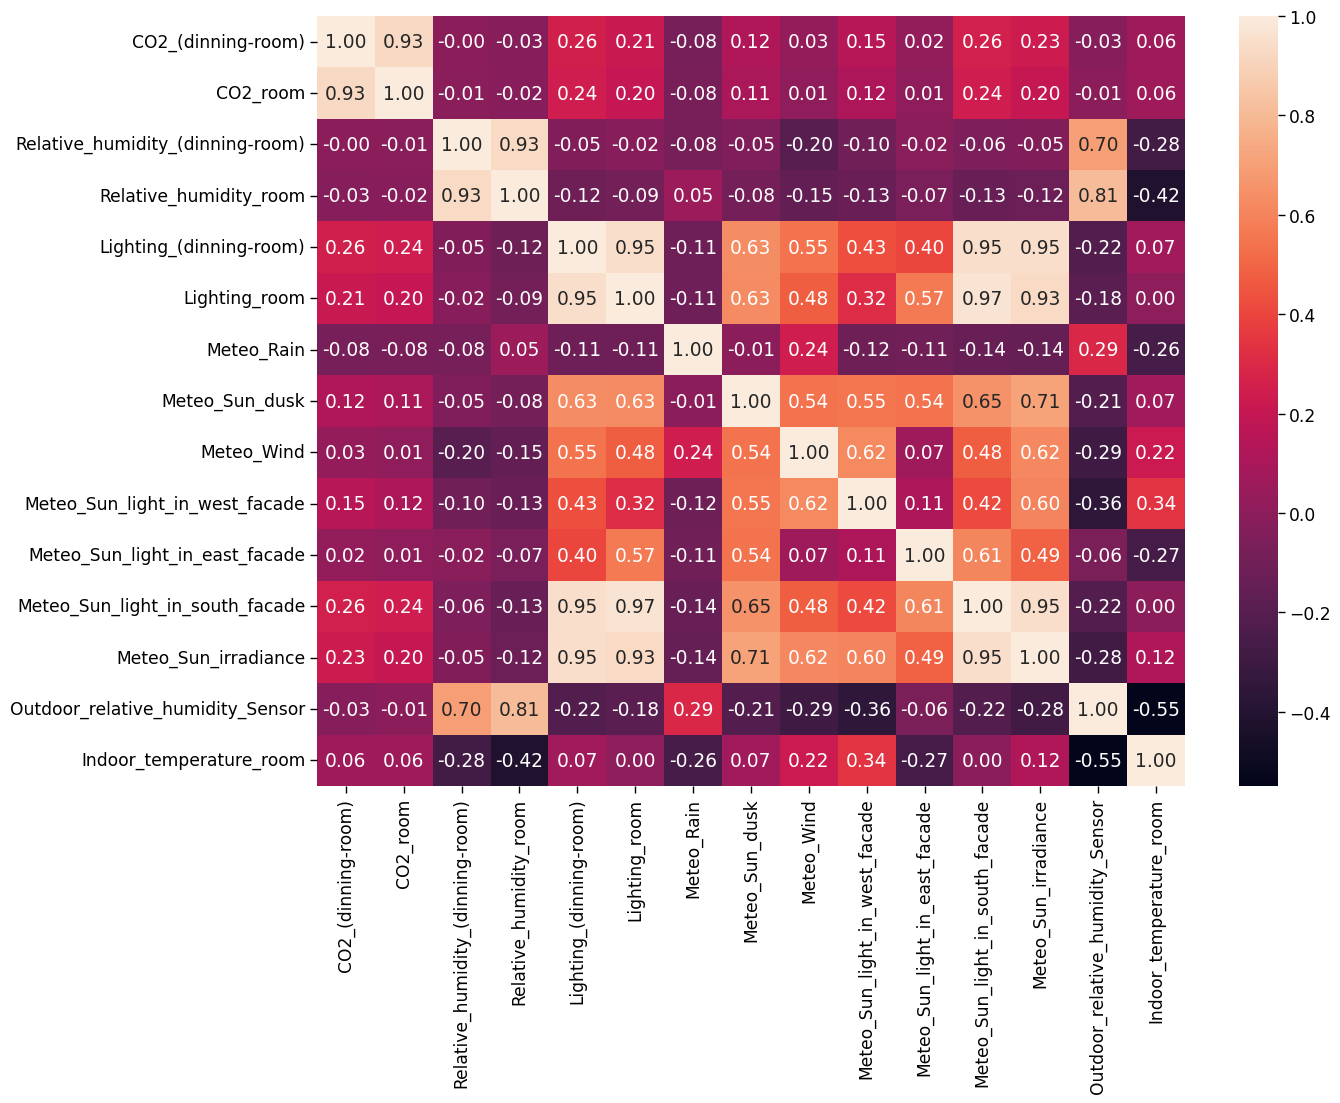

In [9]:
plt.figure(figsize=(14,10))
corr1 = data.drop(["Date", "Time", "Day_of_the_week"], axis=1).corr()
sns.heatmap(corr1, xticklabels=corr1.columns.values, yticklabels=corr1.columns.values, annot=True, fmt=".2f")

In [67]:
data_tmp = data.drop(["Date", "Time", "Day_of_the_week"], axis=1)
correlation_value = 0.6
correlation = data_tmp.corr()
columns = data_tmp.columns

correlation_col_names = []
n = 0
for col_name in columns:
    if n != 0:
        correlation_tmp = correlation.iloc[0:n, [n]]
        tmp = correlation_tmp.loc[(abs(correlation_tmp[col_name]) >= correlation_value), col_name].to_frame()
        if not tmp.empty:
            index = tmp.index.tolist()
            for i in index:
                tmp_list = [col_name, i]
                correlation_col_names.append(tmp_list)
    n += 1

### Correlation plots

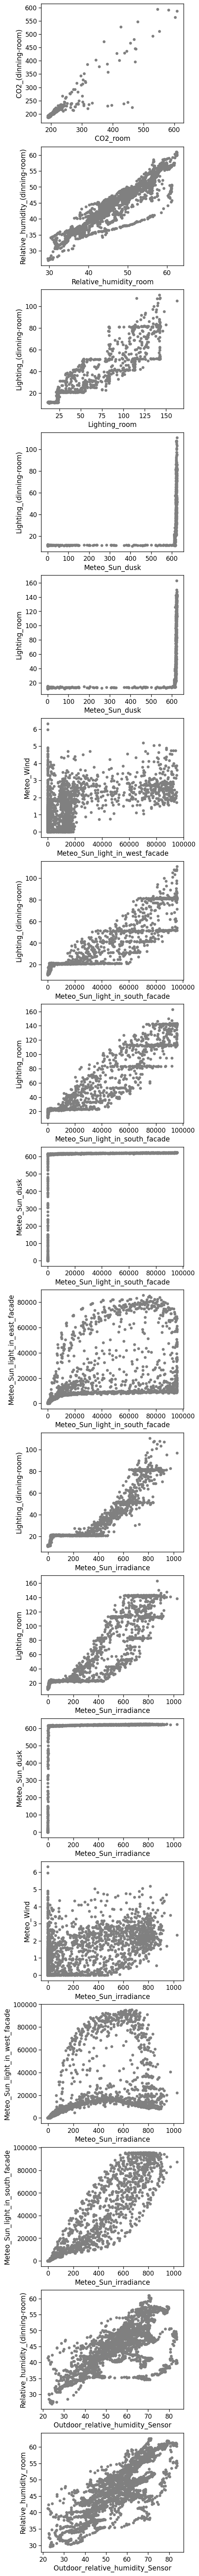

In [13]:
n = len(correlation_col_names)
fig, ax = plt.subplots(n, figsize=(5, 5*n))
i = 0
correlation_col_names_new = correlation_col_names[:len(correlation_col_names)]

for x, y in correlation_col_names_new:
    ax[i].scatter(x = data_tmp[x], y = data_tmp[y], color='gray')
    ax[i].set_xlabel(x)
    ax[i].set_ylabel(y)
    i += 1

plt.show()

In [59]:
max(data["Indoor_temperature_room"])

24.944

## Change of variables values in time

As we can see between 19/03/2012 at 17:45 and 21/03/2012 at 19:45 there are some drastic changes in variables values, for example in humidity, lighting, wind, sunlight, rain, and indoor temperature. It seems that during this time interval, the weather conditions are worse (maybe some storm) in comparison to other days.

In [66]:
print(data.iloc[600,:])
print(data.iloc[800,:])

Date                                19/03/2012
Time                                     17:45
CO2_(dinning-room)                     202.208
CO2_room                               203.883
Relative_humidity_(dinning-room)       36.4827
Relative_humidity_room                  35.008
Lighting_(dinning-room)                17.2953
Lighting_room                          23.3413
Meteo_Rain                                 0.0
Meteo_Sun_dusk                          613.76
Meteo_Wind                            0.791333
Meteo_Sun_light_in_west_facade         551.936
Meteo_Sun_light_in_east_facade          143.36
Meteo_Sun_light_in_south_facade        372.736
Meteo_Sun_irradiance                   13.1867
Outdoor_relative_humidity_Sensor        46.536
Day_of_the_week                            1.0
Indoor_temperature_room                20.1507
Name: 600, dtype: object
Date                                21/03/2012
Time                                     19:45
CO2_(dinning-room)                 

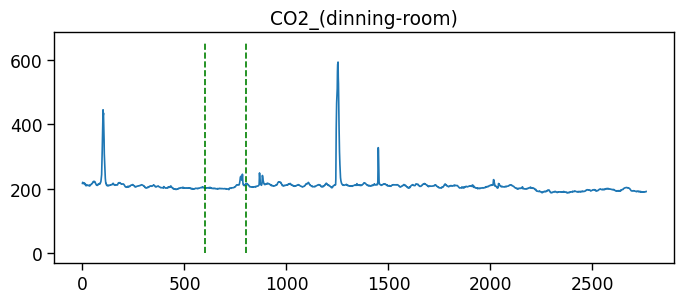

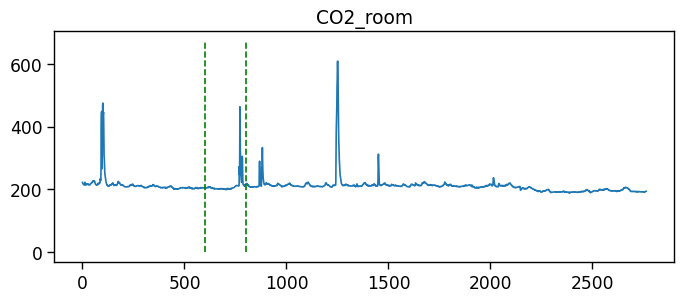

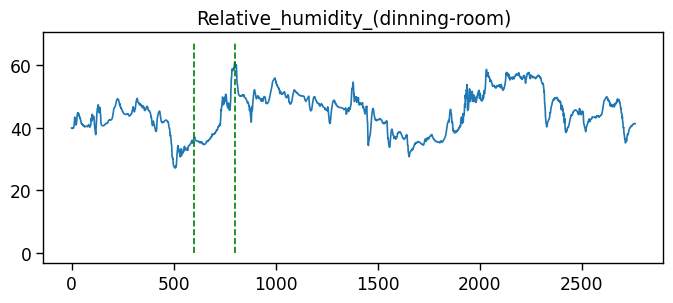

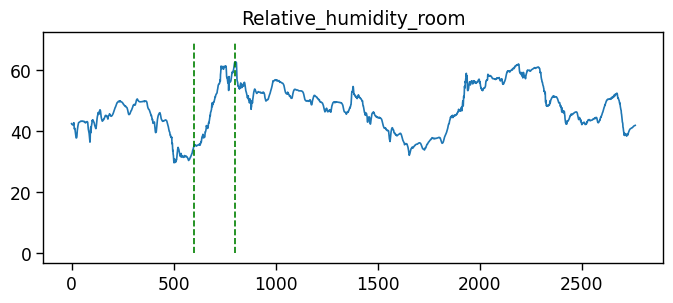

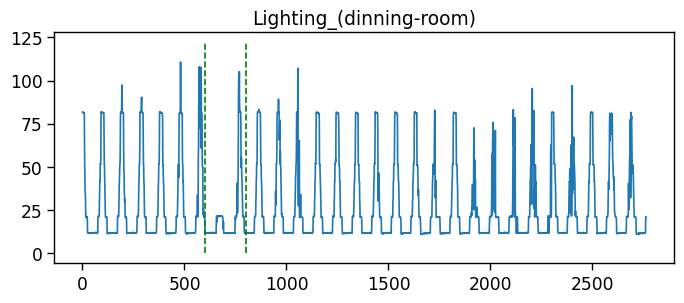

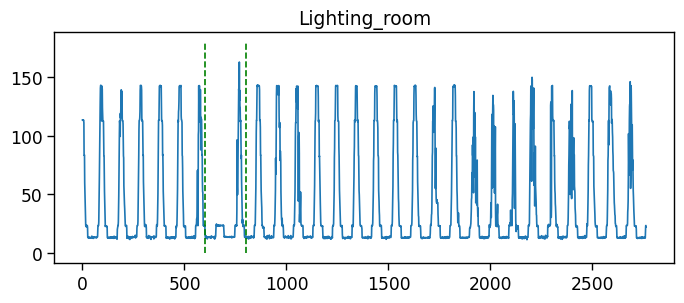

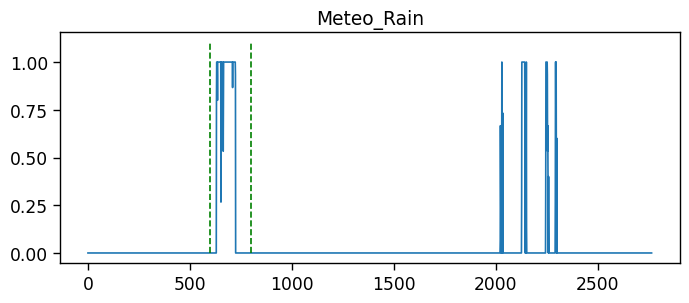

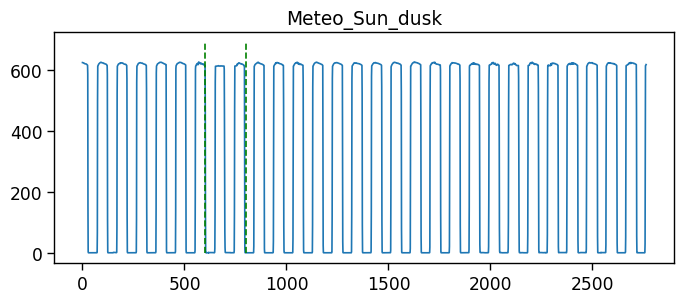

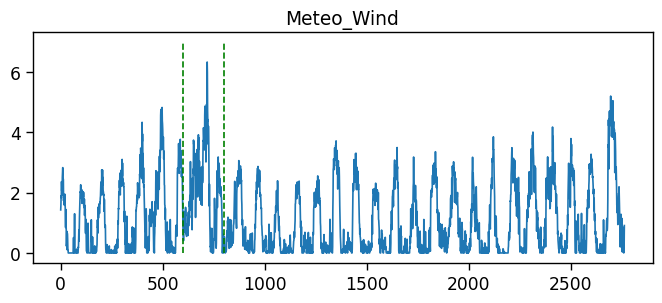

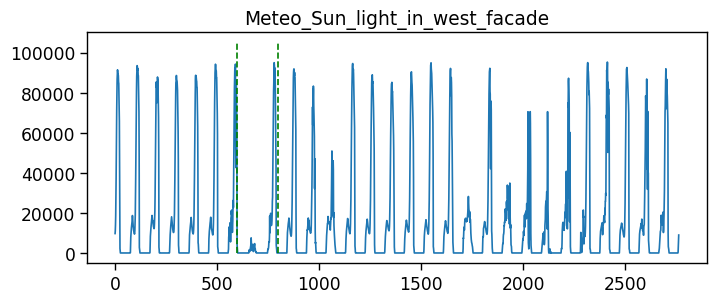

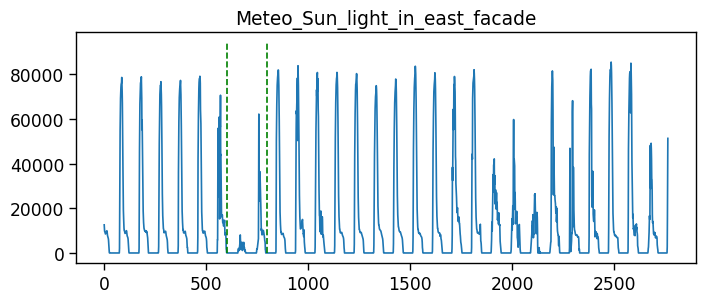

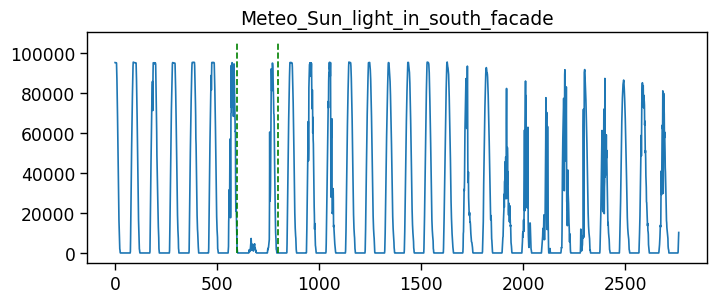

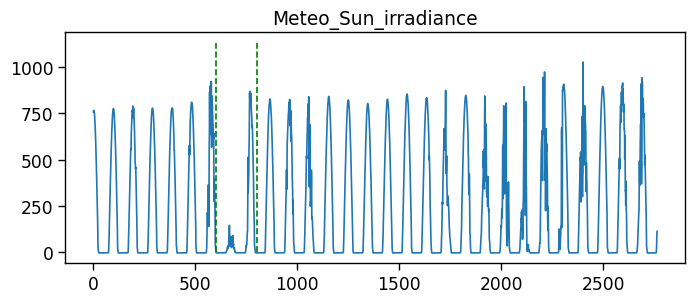

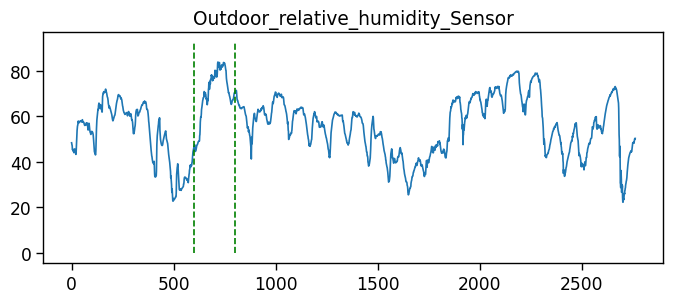

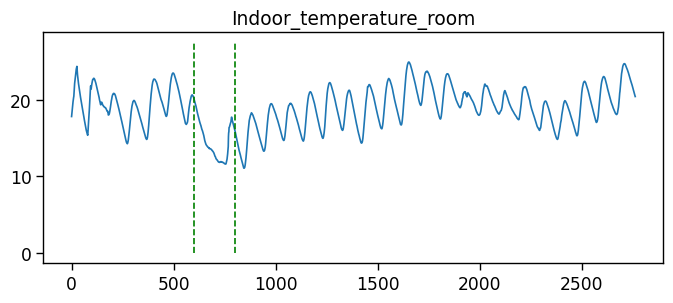

In [62]:
for col in cols_to_analyse:
    plt.figure(figsize = (8, 3))
    plt.plot(data[col])
    plt.title(col)
    plt.vlines(x = 600, ymin = 0, ymax = 1.1*max(data[col]), color = 'green', linestyles = 'dashed')
    plt.vlines(x = 800, ymin = 0, ymax = 1.1*max(data[col]), color = 'green', linestyles = 'dashed')